### 1. Setting up and Gathering Data

In [1]:
!pip install -U pip 
!pip install labelme tensorflow opencv-python matplotlib albumentations

Above installations:
- labelme: GUI to draw image annotations
- tensorflow: deep learning library to train neural net
- opencv: image/video/I/O and CV ops (resize, blur, edges, etc)
- matplotlib: plotting library for charts and visualizations
- albumentations: fast image augmentations for training

### 1.2 Collect Images With OpenCV

In [2]:
import os 
import time
import uuid
import cv2

Libraries above:
- os: file system & OS stuff like paths, env vars, etc..
- time: timestamps, delays, timing
- uuid: generate unique ID's for file names
- cv2: read/write images, resize/rotate, draw, video capture


In [3]:
IMAGE_PATH = os.path.join('data','image')
number_images = 30

In [4]:
import sys, platform
print(sys.executable)         
print(platform.machine())     
%pip -V                      

/opt/anaconda3/envs/deepface311/bin/python
arm64
pip 25.2 from /opt/anaconda3/envs/deepface311/lib/python3.11/site-packages/pip (python 3.11)
Note: you may need to restart the kernel to use updated packages.


In [6]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGE_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

Above is for accessing the users image capture device, then looping through the range of images we've collected. 
Were going to print out which image were at and the number. Were then going to read from our capture device... we will be given a return value and a frame. This will be done using cv2.imwrite and then well show what we've got with cv2.imshow.

I've added a half a second delay between each frame, which allows you to move your head around in different positions. 

### 1.3 Annotating Images using LabelMe

In [1]:
!labelme

2025-09-09 21:14:11.734 | INFO     | labelme.config:get_config:66 - Loading config file from: /Users/kmchale/.labelmerc
2025-09-09 21:14:14.121 | DEBUG    | labelme.widgets.canvas:set_ai_model_name:140 - Setting AI model to 'sam2:latest'
2025-09-09 21:14:35.686 python[40823:2287458] The class 'NSOpenPanel' overrides the method identifier.  This method is implemented by class 'NSWindow'


Above the images have been collected and annotated using labelme.

### 2. Process Dataset and Build Loading Function for Images

In [1]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

Libraries above:
- jason: read/write JSON files (for the annotated images)
- numpy as np: fast n-dimensional arrays and math
- matplotlib.pyplot as pit: plotting interface to make figures

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
images = tf.data.Dataset.list_files('data/image/*.jpg', shuffle=False

Code above limits GPU memory growth. Next we need to load our images into our data pipeline.

The *.jpg is the wildcard... It is there so images represents every file that ends with a .jpg

In [ ]:
images.as_numpy_iterator().next()

In [16]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [17]:
images = images.map(load_image)

In [18]:
images.as_numpy_iterator().next()

array([[[165, 152, 133],
        [162, 149, 130],
        [160, 147, 128],
        ...,
        [181, 178, 147],
        [168, 165, 134],
        [155, 152, 121]],

       [[168, 155, 136],
        [165, 152, 133],
        [162, 149, 130],
        ...,
        [181, 178, 147],
        [170, 167, 136],
        [161, 158, 127]],

       [[168, 155, 138],
        [165, 152, 135],
        [163, 150, 131],
        ...,
        [185, 182, 151],
        [180, 177, 146],
        [174, 171, 140]],

       ...,

       [[128, 125,  92],
        [127, 124,  91],
        [126, 123,  90],
        ...,
        [ 64,  54,  44],
        [ 65,  55,  45],
        [ 65,  55,  45]],

       [[124, 121,  88],
        [125, 122,  89],
        [126, 123,  90],
        ...,
        [ 64,  54,  44],
        [ 67,  55,  43],
        [ 67,  55,  43]],

       [[119, 116,  83],
        [121, 118,  85],
        [124, 121,  88],
        ...,
        [ 64,  54,  44],
        [ 67,  55,  43],
        [ 67,  55,  43]]

### 2.1 View Images in MatPlotLib
Images are inside of the tensorflow data pipeline that are listed above as arrays. Next is visualizing the images in matplotlib

In [19]:
image_generator = images.batch(4).as_numpy_iterator()

In [20]:
plot_images = image_generator.next()

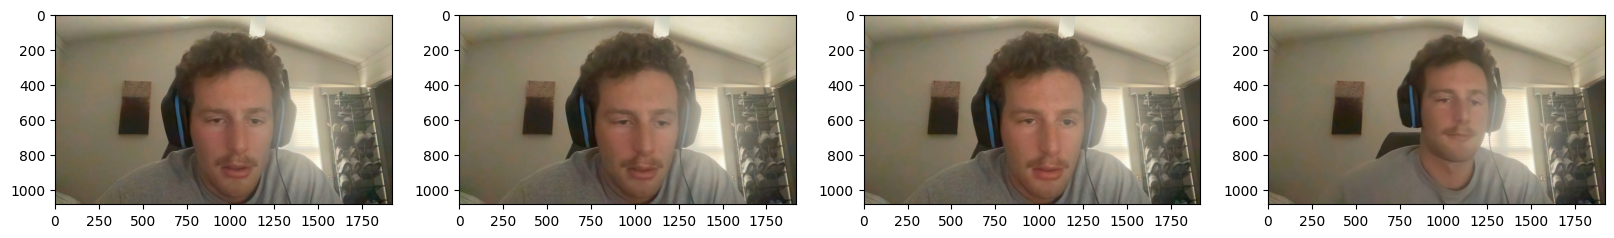

In [21]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()

Just manually splitting data now into train, test, and val.